#### Como Simular Aportes Recorrentes em Criptomoedas utilizando Python (O Poder dos Investimentos Fundamentalistas)

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = yf.Ticker('MANA-USD').history(period = '1y', interval = '1mo')['Close']
df = pd.DataFrame(df)

In [11]:
df['Aporte'] = 1

In [12]:
# for ano in list(df.index.year.unique()):
    
#     df.loc[str(ano), 'Aporte'] = (ano - 2016) * 1000

In [13]:
for i in range(len(df)-1):
    
    inv = (df['Close'][df.index[i]:].pct_change()+1).cumprod()
    
    df[f'inv_{i}'] = inv * df['Aporte']

inv_columns = [f'inv_{i}' for i in range(len(df)-1)]

In [14]:
df_result = df[inv_columns].transpose()
df.drop(columns = inv_columns, inplace=True)

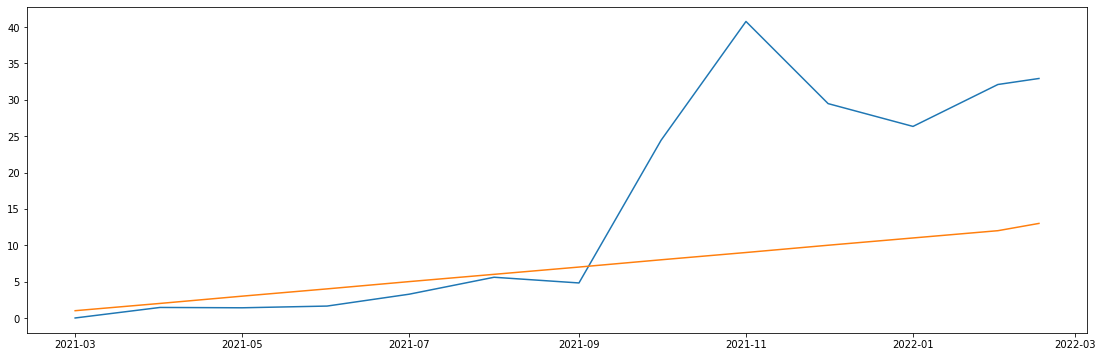

In [16]:
plt.figure(figsize=(19,6))
plt.plot(df_result.sum())
plt.plot(df['Aporte'].cumsum())
plt.show()